<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/PRACTICA6/P6_Python_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"><img alt="udeA logo" height="150px" src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr"></p>

<h1><b>Práctica 6: Diseño de filtros digitales</b></h1>
<h4><b>Bioseñales y sistemas<br>Universidad de Antioquia, Facultad de Ingeniería - Bioingeniería<br>2024-2</b></h4><br>

<h4><b>Grupo:</b> 3</h4>
<h4><b>Integrantes:</b> Mariana Álvarez Yarce - Ana María Seguro Acevedo</h4>

#<b>Procedimiento</b>

<b>4.1. Creación de la señal</b>

Proponga una secuencia sinusoidal $x_e(n)$, con $0 ≤ n ≤ 1000$, $F_0 = 0,01 \: Hz$ y $F_s = 25 \: Hz$. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética $x_e(n)$ a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:<br><br>

<center>$y_e(n) = αx_e(n-D) + w(n)$</center><br>

Donde $α$ representa la amplitud, $D$ es un retraso debido a la conducción a través de los diversos tejidos y $w(n)$ representa el ruido generado por la electrónica de los sistemas de adquisición.

<b>1)</b> Genere las secuencias ficticias $x_e(n)$ y $y_e(n)$, implemente $w(n)$ como una secuencia de ruido Gaussiano con media cero y varianza $σ^2 = 0,01$, establezca $α = 0,8$ y un retraso $D = 15$ muestras. Grafique ambas señales.

<b>Nota:</b> Para generar el ruido gaussiano use la función de ```numpy: np.random.normal```.

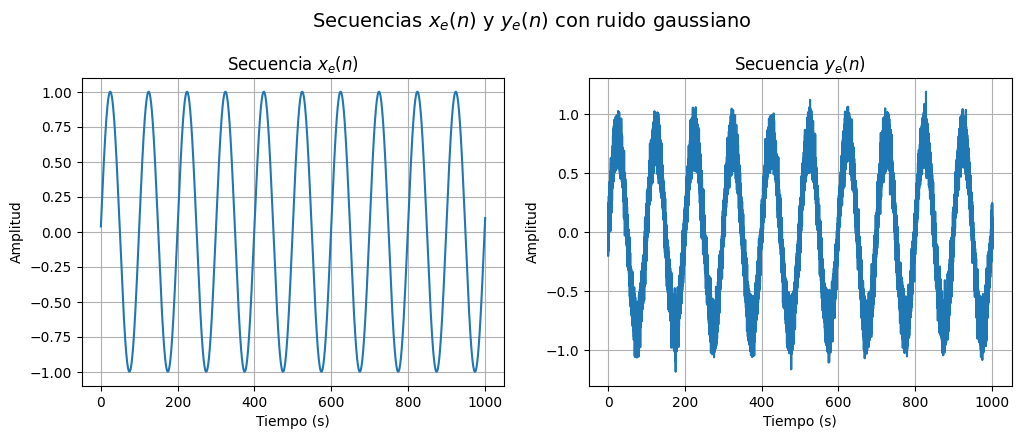

In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

F0 = 0.01
Fs = 25
alfa = 0.8
D = 15
var = 0.01
media = 0

n = np.arange(0, 1001, 1/Fs)
x_e = np.sin(2*np.pi*F0*(n + D/Fs))
w_n = np.random.normal(media, np.sqrt(var), len(n))
y_e = alfa*x_e + w_n

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Secuencias $x_e(n)$ y $y_e(n)$ con ruido gaussiano', x=0.5, y=1.05, fontsize=14)
axs[0].plot(n, x_e)
axs[0].set(xlabel='Tiempo (s)', ylabel='Amplitud', title='Secuencia $x_e(n)$')
axs[0].grid()

axs[1].plot(n, y_e)
axs[1].set(xlabel='Tiempo (s)', ylabel='Amplitud', title='Secuencia $y_e(n)$')
axs[1].grid()
plt.show()

<b>4.2. Diseño de un filtro</b>

La función ```firwin``` permite diseñar un filtro FIR utilizando el método de ventanas, donde los principales argumentos de entrada son:

> $N$: Orden del filtro<br>
$W_n$: Frecuencia de corte

Para filtros digitales $W_n$ está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la señal. $W_n$ es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.


<b>2)</b> Diseñe un filtro FIR pasa bajas para la señal $y_e(n)$, con una frecuencia de corte de 1.25 muestras/s y orden 30.

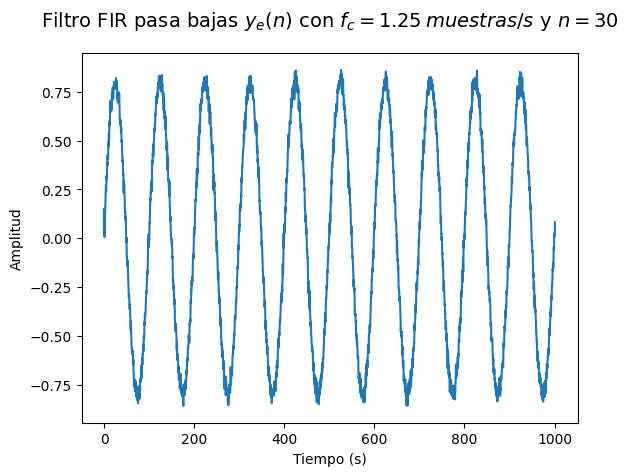

In [4]:
order = 30
nyquist = Fs/2
w_normalized = 1.25/nyquist
lowpass = signal.firwin(order+1, w_normalized, pass_zero='lowpass', window='hamming')
y_f_30 = signal.filtfilt(b=lowpass, a=1, x=y_e)

plt.plot(n, y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Filtro FIR pasa bajas $y_e(n)$ con $f_c=1.25 \: muestras/s$ y $n=30$', x=0.5, y=1.05, fontsize=14)
plt.show()

<b>3) </b> ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

<b>Nota:</b> Resultado esperado diseño de 3 filtros FIR (pasa bajas, pasa altas y pasa banda)

Para el filtro pasa altas se reemplaza el argumento ```pass_zero=False``` o ```pass_zero='highpass'```. Además, se utiliza la frecuencia de corte de 7.5 muestras/s para el cálculo de $w_n$ normalizada.

Como la señal $y_e(n)$ tiene principalmente componentes de frecuencia bajas (frecuencia fundamental de 0.01 Hz), este tipo de filtro atenúa la señal y deja pasar el ruido gaussiano introducido.

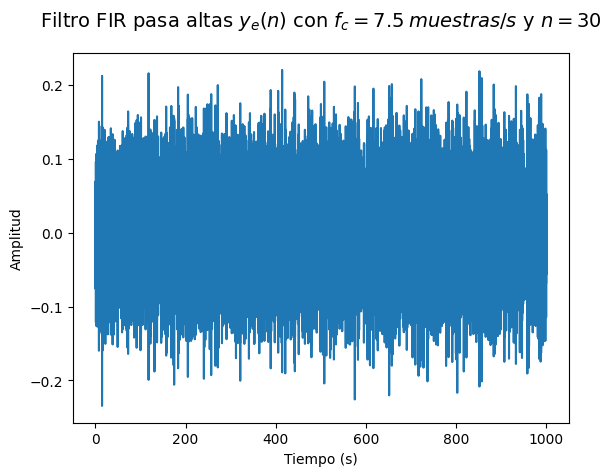

In [5]:
w_normalized = 7.5/nyquist
highpass = signal.firwin(order+1, w_normalized, pass_zero='highpass', window='hamming')
y_f_30 = signal.filtfilt(b=highpass, a=1, x=y_e)

plt.plot(n, y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Filtro FIR pasa altas $y_e(n)$ con $f_c=7.5 \: muestras/s$ y $n=30$', x=0.5, y=1.05, fontsize=14)
plt.show()

Para el filtro pasa bandas se consideran ambas frecuencias de corte que se trabajaron anteriormente. Se define el argumento ```pass_zero=False``` o ```pass_zero='bandpass'``` y las frecuencias normalizadas como una lista considerando la frecuencia de corte de 1.25 muestras/s y de 7.5 muestras/s.

Al igual que con el filtro pasa altas, se pasan atenuadas las frecuencias que componen la señal $y_e(n)$ por estar por debajo de la frecuencia límite de la banda definida, y solo se percibe el ruido.

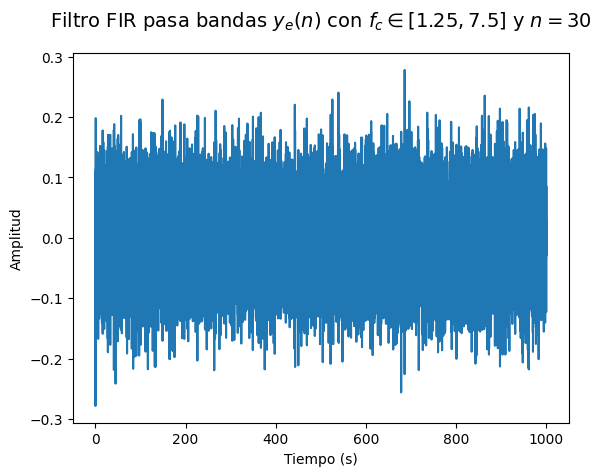

In [6]:
w_normalized = [1.25/nyquist, 7.5/nyquist]
bandpass = signal.firwin(order+1, w_normalized, pass_zero=False, window='hamming')
y_f_30 = signal.filtfilt(b=bandpass, a=1, x=y_e)

plt.plot(n, y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Filtro FIR pasa bandas $y_e(n)$ con $f_c \in [1.25, 7.5]$ y $n=30$', x=0.5, y=1.05, fontsize=14)
plt.show()

La función ```iirfilter``` permite diseñar un filtro IIR.

<b>4)</b> Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.

<b>Nota:</b> Resultado esperado diseño de 3 filtros IIR (pasa bajas, pasa altas y pasa banda)

Para el filtro IIR se requirió un orden menor para obtener la señal filtrada; cuando se aplicó un orden de 30 aparecieron valores indeterminados, por lo que se optó por definir la mitad de ese valor como nuevo orden para el filtro. Se empleó la frecuencia de corte normalizada de 1.25 muestras/s para la configuración pasa bajas.

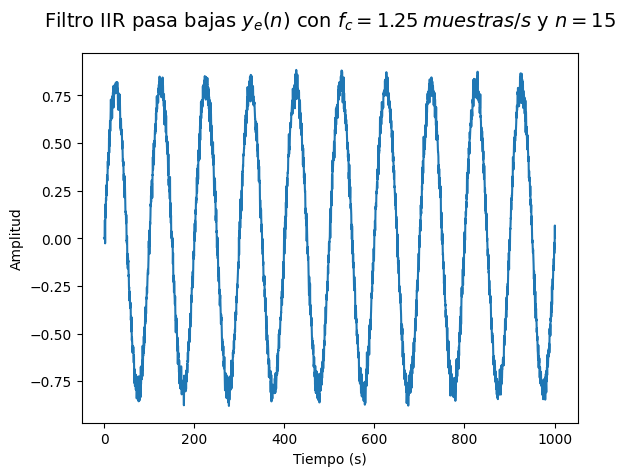

In [7]:
order = 15
w_normalized = 1.25/nyquist
b_low, a_low = signal.iirfilter(order, w_normalized, btype='lowpass')
y_f_15 = signal.lfilter(b_low, a_low, y_e)

plt.plot(n, y_f_15)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title(f'Filtro IIR pasa bajas $y_e(n)$ con $f_c=1.25 \: muestras/s$ y $n={order}$', x=0.5, y=1.05, fontsize=14)
plt.show()

Para el filtro pasa altas se reemplaza el argumento ```btype='highpass'```. Además, se utiliza la frecuencia de corte de 7.5 muestras/s para el cálculo de $w_n$ normalizada.

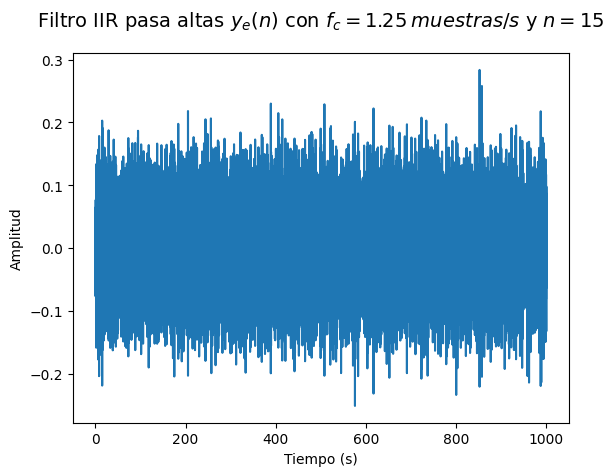

In [8]:
w_normalized = 7.5/nyquist
b_high, a_high = signal.iirfilter(order, w_normalized, btype='highpass')
y_f_15 = signal.lfilter(b_high, a_high, y_e)

plt.plot(n, y_f_15)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title(f'Filtro IIR pasa altas $y_e(n)$ con $f_c=1.25 \: muestras/s$ y $n={order}$', x=0.5, y=1.05, fontsize=14)
plt.show()

Para el filtro pasa bandas se consideran ambas frecuencias de corte que se trabajaron anteriormente. Se define el argumento ```ftype='bandpass'```.

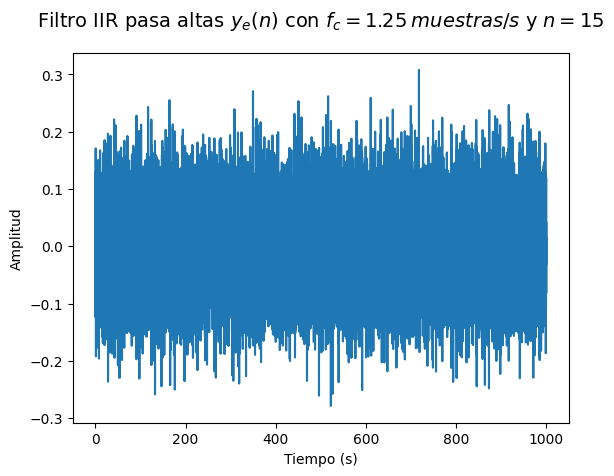

In [9]:
w_normalized = [1.25/nyquist, 7.5/nyquist]
b_pass, a_pass = signal.iirfilter(order, w_normalized, btype='bandpass')
y_f_15 = signal.lfilter(b_pass, a_pass, y_e)

plt.plot(n, y_f_15)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title(f'Filtro IIR pasa altas $y_e(n)$ con $f_c=1.25 \: muestras/s$ y $n={order}$', x=0.5, y=1.05, fontsize=14)
plt.show()

Para verificar la respuesta en fase y magnitud de los filtros, se implementa una función para graficar su respuesta al impulso en el dominio de la frecuencia, que recibe por argumentos el denominador y numerador de la función de transferencia del filtro, el orden y la frecuencia de Nyquist.

In [10]:
def mfreqz(b_fir, order_fir, b_iir, a_iir, order_iir, title, nyq_rate=1):
    w_fir, h_fir = signal.freqz(b_fir, 1)
    h_dB_fir = 20 * np.log10 (abs(h_fir))

    w_iir, h_iir = signal.freqz(b_iir, a_iir);
    h_dB_iir = 20 * np.log10 (abs(h_iir))

    w, h = [w_fir, w_iir], [h_fir, h_iir]
    h_db = [h_dB_fir, h_dB_iir]
    order = [order_fir, order_iir]
    filter_type = ['FIR', 'IIR']

    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle(f'Respuesta al impulso en frecuencia de filtros FIR y IIR {title}', x=0.5, y=0.95, fontsize=14, fontweight='bold')
    for row in range(2):
      axs[row, 0].plot((w[row]/max(w[row]))*nyq_rate, abs(h[row]))
      axs[row, 0].set(ylabel='Magnitud', title=r'Respuesta en frecuencia - Orden: ' + str(order[row]) + ' - Tipo: ' + str(filter_type[row]))
      axs[row, 0].grid()

      axs[row, 1].plot((w[row]/max(w[row]))*nyq_rate, h_db[row])
      if row == 1:
        axs[row, 1].set(xlabel=r'Frecuencia normalizada (x$\pi$rad/sample)')
      axs[row, 1].set(ylabel='Magnitud (dB)', title=r'Respuesta en frecuencia - Orden: ' + str(order[row]) + ' - Tipo: ' + str(filter_type[row]))
      axs[row, 1].grid()

      h_Phase = np.unwrap(np.arctan2(np.imag(h[row]),np.real(h[row])))
      axs[row, 2].plot((w[row]/max(w[row]))*nyq_rate, h_Phase)
      axs[row, 2].set(ylabel='Fase (rad)', title=r'Respuesta en fase - Orden: ' + str(order[row]) + ' - Tipo: ' + str(filter_type[row]))
      axs[row, 2].grid()

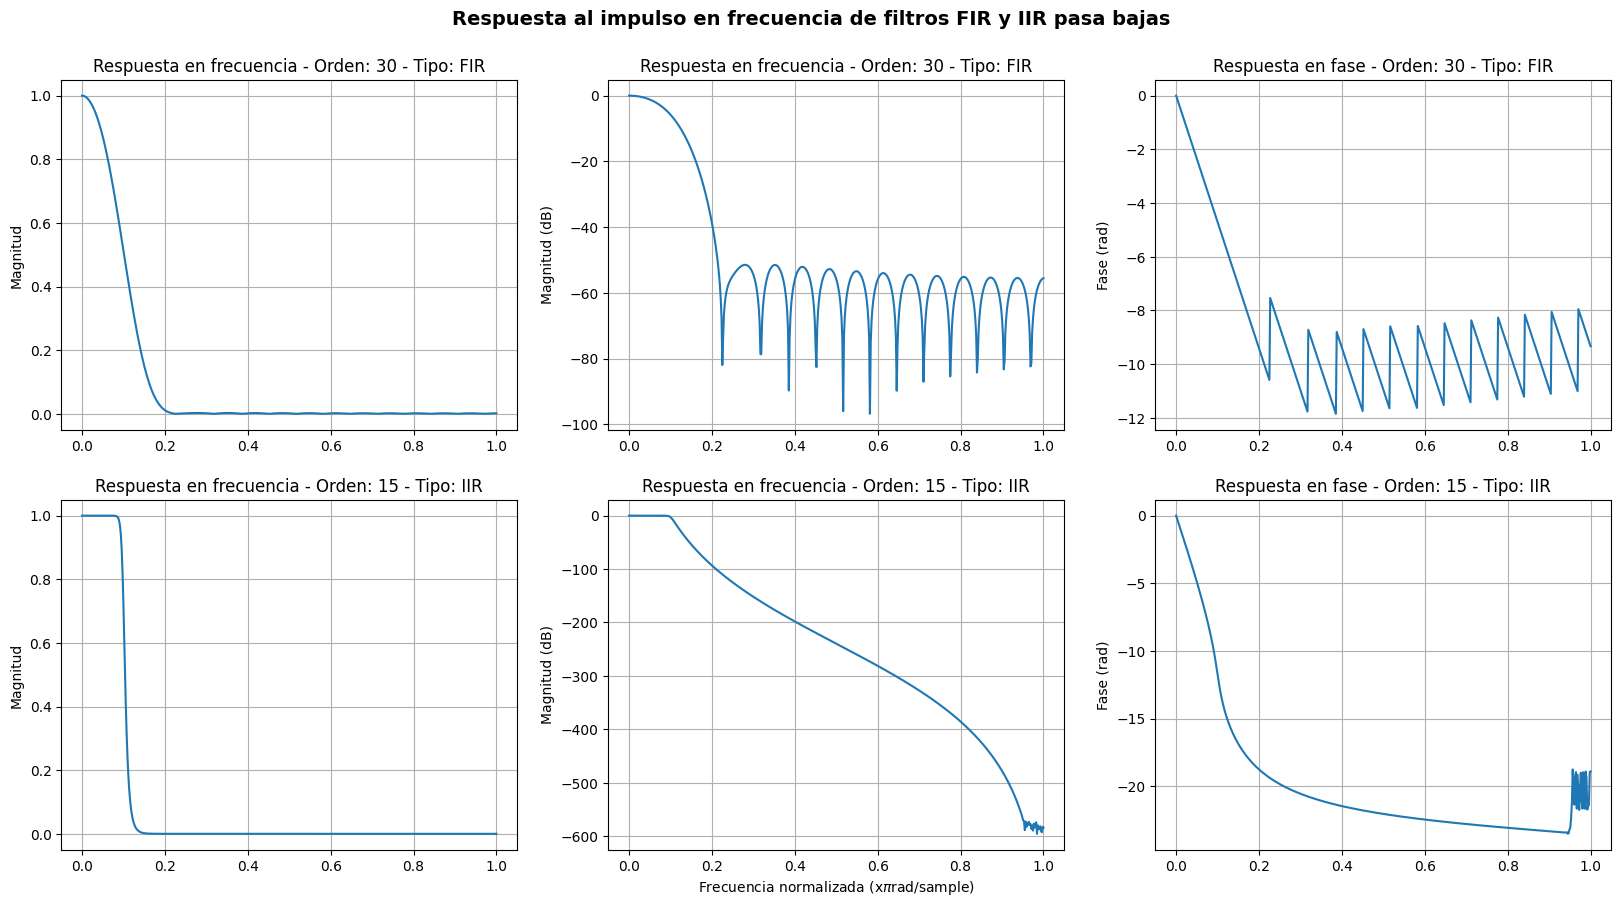

In [11]:
mfreqz(b_fir=lowpass, order_fir=30, b_iir=b_low, a_iir=a_low, order_iir=15, title='pasa bajas')

De los gráficos de la respuesta al impulso para el filtro FIR pasa bajas se evidencia un decrecimiento en la magnitud, tanto adimensional como en dB, para valores crecientes de frecuencia. Por otro lado, se presenta un desplazamiento de fase considerable para frecuencias normalizadas a partir de 0.2 Hz o en la banda de rechazo.

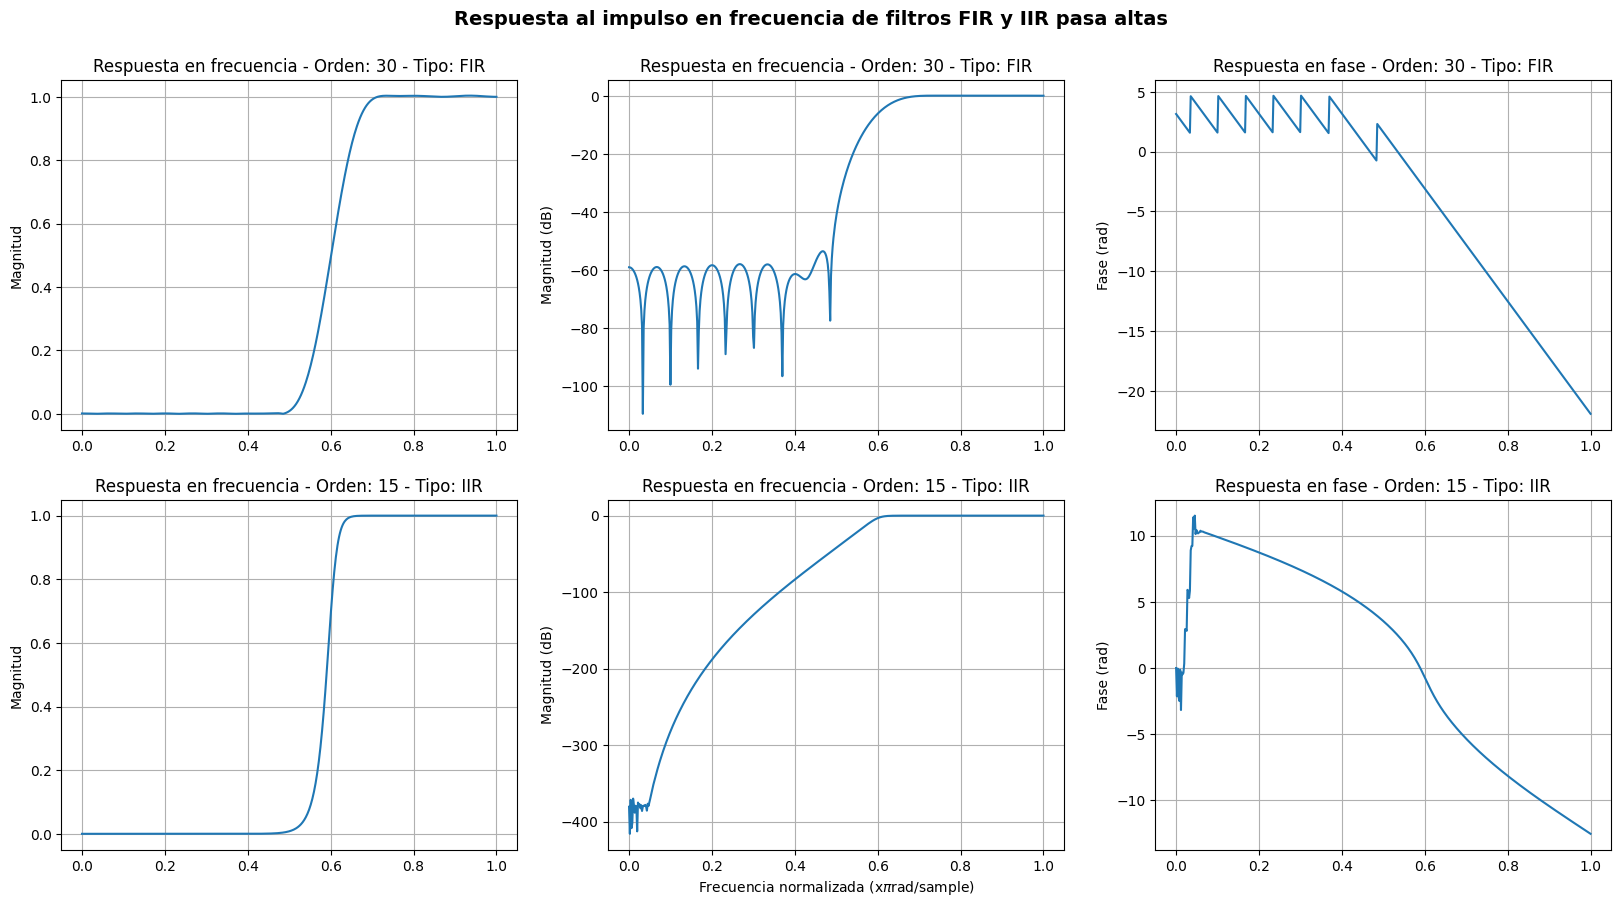

In [12]:
mfreqz(b_fir=highpass, order_fir=30, b_iir=b_high, a_iir=a_high, order_iir=15, title='pasa altas')

De los gráficos de la respuesta al impulso para el filtro FIR pasa altas se evidencia un comportamiento contrario al del filtro pasa bajas, donde las frecuencias bajas hasta casi la frecuencia de corte son atenuadas, mientras que las frecuencias normalizadas altas pasan con una magnitud alta. En cuanto a la fase se observa un leve desplazamiento positivo de la fase en las frecuencias bajas, y un desfase considerable para frecuencias altas.

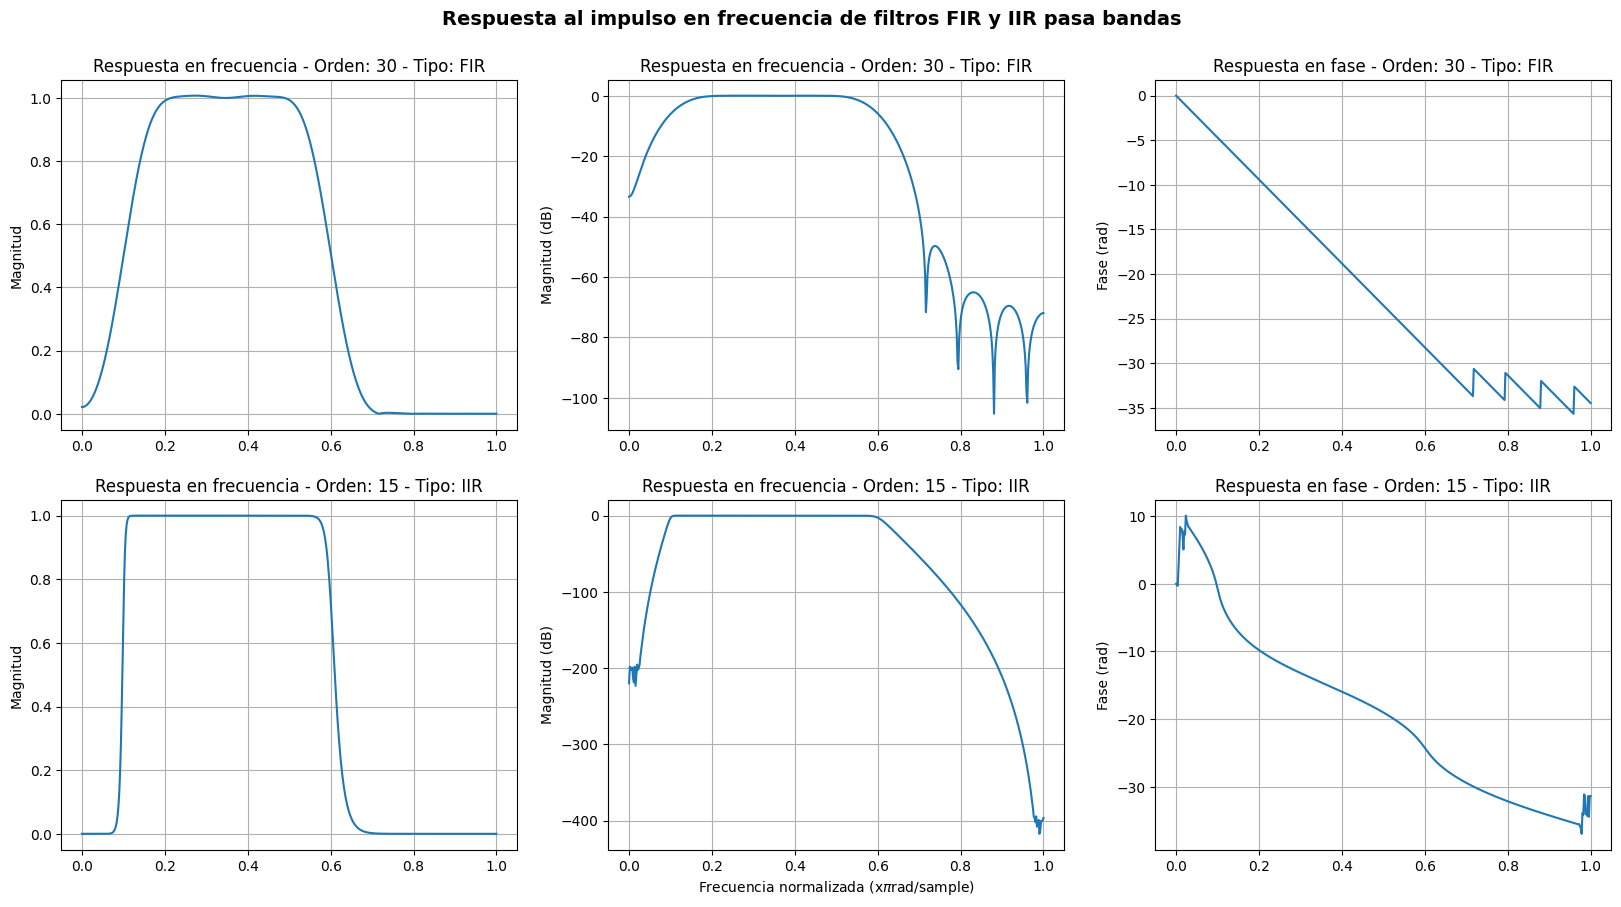

In [13]:
mfreqz(b_fir=bandpass, order_fir=30, b_iir=b_pass, a_iir=a_pass, order_iir=15, title='pasa bandas')

De los gráficos de la respuesta al impulso para el filtro FIR pasa bandas se observa una atenuación para las frecuencia a los lados de la banda principal entre las frecuencias normalizadas equivalentes a 1.25 y 7.5 muestras/s. En cuanto a la fase, se presenta un rango desplazado menor para las frecuencias normalizadas altas.

<b>4.3. Filtrado</b>

Las funciones ```lfilter``` y ```filtfilt``` filtran una secuencia de información $x(n)$ usando un filtro IIR o FIR.


<b>5)</b> Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal $y_e(n)$ ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.

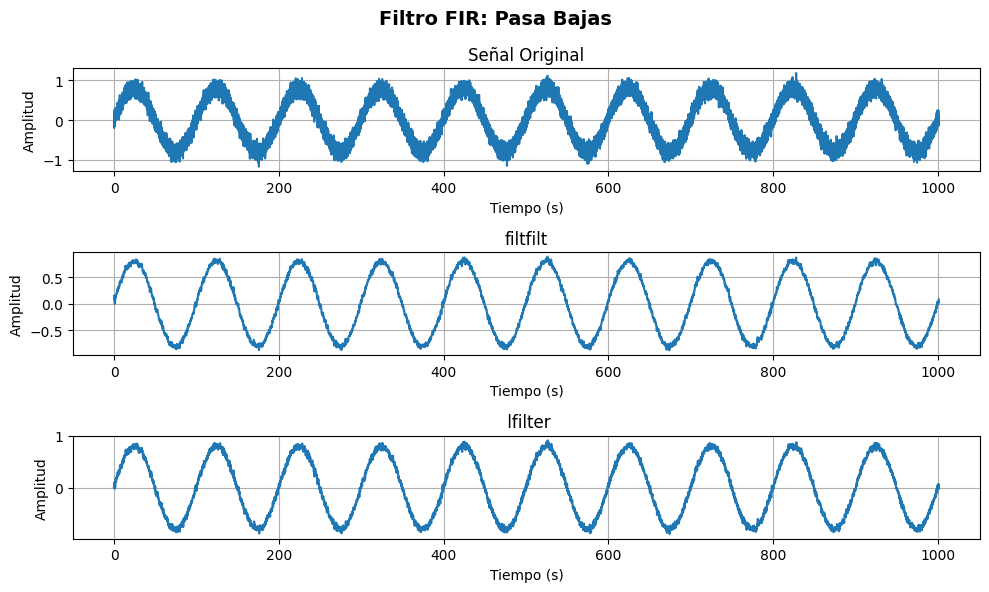

In [14]:
w_normlow=1.25/nyquist
lowpass = signal.firwin(order+1, w_normlow, window='hamming')
y_f_lfilter = signal.lfilter(b=lowpass, a=1, x=y_e)
y_f_filtfilt = signal.filtfilt(b=lowpass, a=1, x=y_e)

plt.figure(figsize=(10, 6))
plt.suptitle("Filtro FIR: Pasa Bajas", fontsize=14,fontweight='bold')

plt.subplot(3, 1, 1)
plt.plot(n, y_e)
plt.title("Señal Original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()
plt.subplot(3, 1, 2)
plt.plot(n, y_f_filtfilt)
plt.title("filtfilt")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(n, y_f_lfilter)
plt.title(" lfilter")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()
plt.tight_layout()
plt.show()

<b>6)</b> Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal $y_e(n)$ ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.

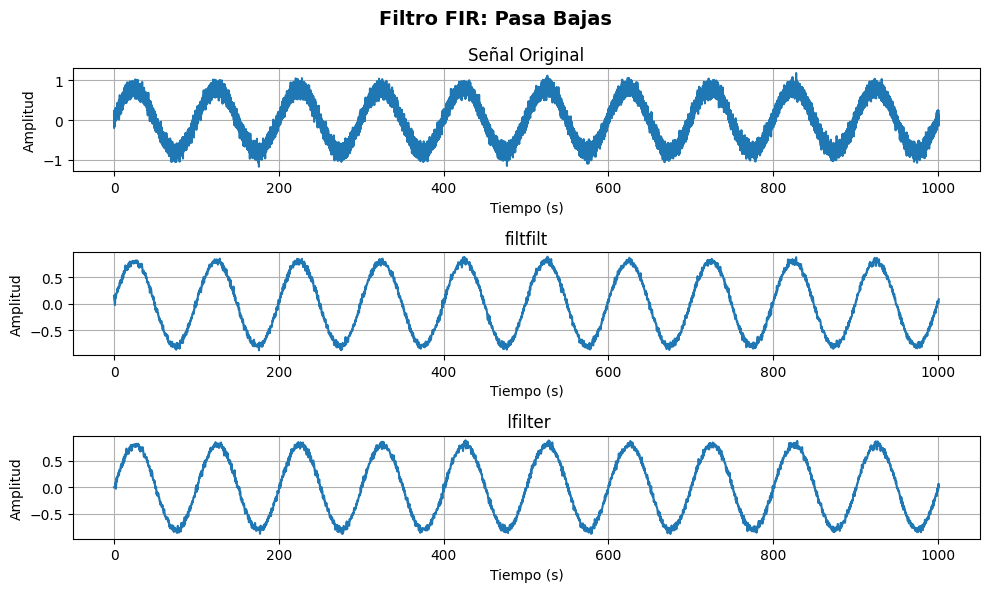

In [15]:
orden = 20
w_normlow=1.25/nyquist
blow, alow = signal.iirfilter(order, w_normlow,btype='lowpass', ftype='butter')
y_f_lfilter = signal.lfilter(b=blow,a=alow,x=y_e)
y_f_filtfilt = signal.filtfilt(b=blow,a=alow,x=y_e)

plt.figure(figsize=(10, 6))
plt.suptitle("Filtro FIR: Pasa Bajas", fontsize=14,fontweight='bold')

plt.subplot(3, 1, 1)
plt.plot(n, y_e)
plt.title("Señal Original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()
plt.subplot(3, 1, 2)
plt.plot(n, y_f_filtfilt)
plt.title("filtfilt")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(n, y_f_lfilter)
plt.title(" lfilter")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()
plt.tight_layout()
plt.show()

<b>4.4. Aplicación</b>

Cargue la señal <i>señal_filtros.txt</i> adquirida a una frecuencia de muestreo de 500 Hz. Extraiga y trabaje con el canal 1 de la señal.

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


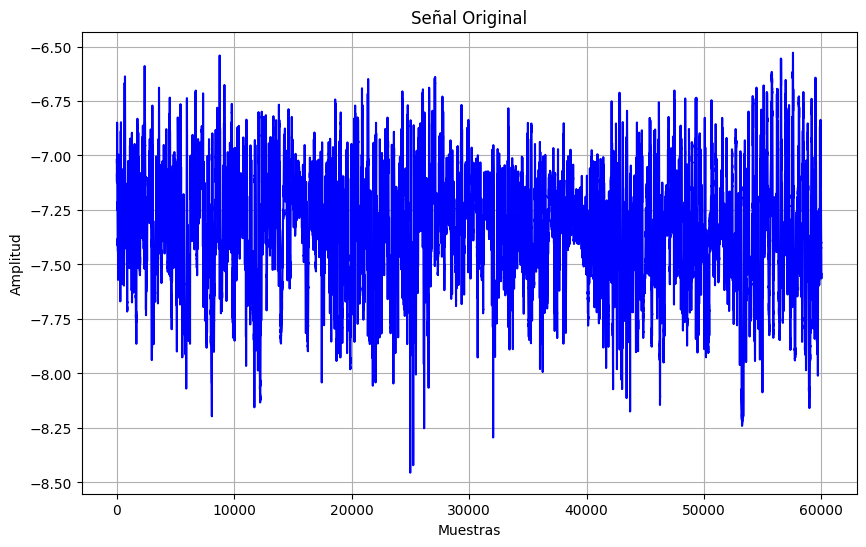

In [17]:
# Carga del archivo de datos
data = np.loadtxt('/content/drive/MyDrive/senal_filtros.txt')
# Se toma el canal 1
canal_1 = data[:, 0]
plt.figure(figsize=(10, 6))
plt.plot(canal_1, color='blue')
plt.title("Señal Original")
plt.ylabel("Amplitud")
plt.xlabel("Muestras")
plt.grid()
plt.show()

<b>7)</b> Realice un análisis frecuencial con la función que permite calcular el
periodograma de Welch de una señal, ¿Hay presencia de ruido eléctrico? Analice.

<b>8)</b> Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.

<b>9)</b> Grafique un segmento de las señales antes y después de filtrar. Analice los cambios.

In [18]:
#Hacer diagrama de bode para ver distorsión y comparar entre FIR y IIR

##<b>Conclusiones</b>

* ...

##<b>Referencias</b>

<b>[1]:</b>